<a href="https://colab.research.google.com/github/Haidar0Muhammed/AI/blob/main/Stocks_Market_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, InputLayer
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf

start_date = '2003-01-01'
end_date = '2022-12-31'

# Set the ticker
ticker = 'GOOGL'

# Get the data
data = yf.download(ticker, start_date, end_date, interval="1d")
data = data.drop(['Adj Close', 'Volume'],axis=1)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011
2004-08-20,2.527778,2.729730,2.515015,2.710460
2004-08-23,2.771522,2.839840,2.728979,2.737738
2004-08-24,2.783784,2.792793,2.591842,2.624374
2004-08-25,2.626627,2.702703,2.599600,2.652653


In [4]:
data.index[-1]

Timestamp('2022-12-30 00:00:00')

In [5]:
#start_date = data.index[0]
#end_date = data.index[-1]

idx = pd.date_range(data.index[0], data.index[-1]) #start_date, end_date)
data = data.reindex(idx, fill_value=np.NaN)
data = data.interpolate(method='linear', limit_direction='forward', axis=0)

print(data.shape)
data.head(10)

(6708, 4)


,Open,High,Low,Close
2004-08-19,2.502503,2.604104,2.401401,2.511011
2004-08-20,2.527778,2.729730,2.515015,2.710460
2004-08-21,2.609026,2.766433,2.586336,2.719553
2004-08-22,2.690274,2.803137,2.657658,2.728645
2004-08-23,2.771522,2.839840,2.728979,2.737738
2004-08-24,2.783784,2.792793,2.591842,2.624374
2004-08-25,2.626627,2.702703,2.599600,2.652653
2004-08-26,2.626376,2.701451,2.619119,2.700450
2004-08-27,2.705205,2.718218,2.644895,2.656406
2004-08-28,2.681682,2.692109,2.614198,2.621872


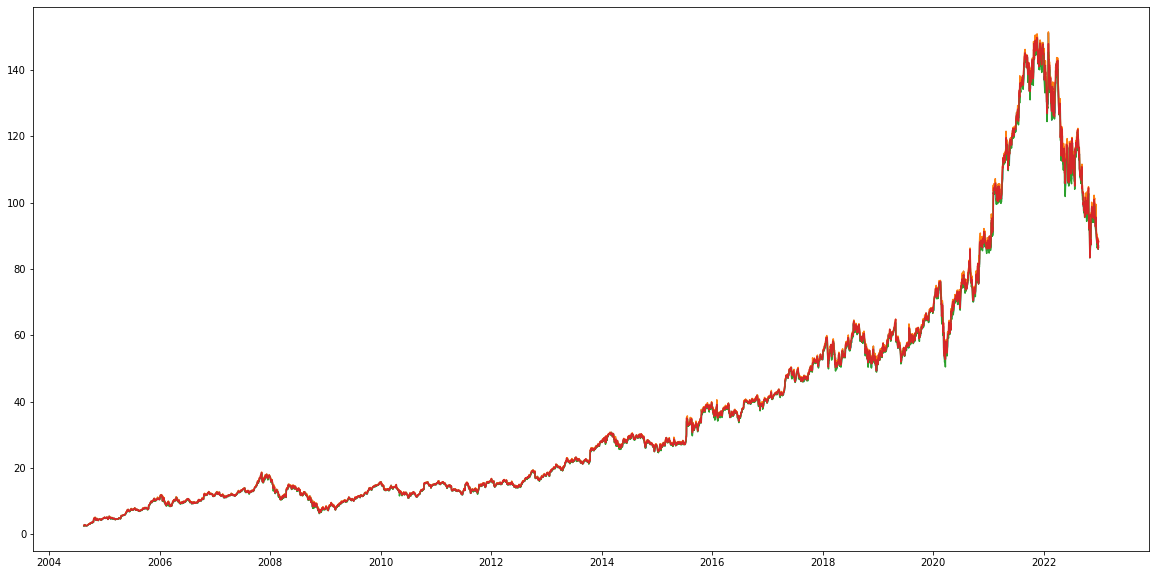

In [6]:
plt.figure(figsize=(20,10))
X_min = pd.to_datetime('2020-01-01')
X_max = pd.to_datetime('2020-01-31')
#plt.axis([X_min, X_max, 10, 100])
plt.plot(data)#,'.')
plt.show()


In [7]:
columns = list(data.columns)
Shift_Num = 59
Predicted_Num = 20

In [8]:
scalar = MinMaxScaler()
data = scalar.fit_transform(data)
data = pd.DataFrame(data, columns=columns, index=idx)
data.head()

,Open,High,Low,Close
2004-08-19,0.000136,0.000390,0.000000,0.000056
2004-08-20,0.000306,0.001233,0.000776,0.001410
2004-08-21,0.000852,0.001479,0.001262,0.001471
2004-08-22,0.001398,0.001725,0.001749,0.001533
2004-08-23,0.001945,0.001972,0.002236,0.001595


In [9]:
df = data.copy()

for i in range(1,Shift_Num+1):
  for Col in columns:
    df[Col+'-'+str(i)] = df[Col].shift(i)

for i in range(1,Predicted_Num+1):
  #for Col in columns:
  Col = 'Close'
  df[Col+'+'+str(i)] = df[Col].shift(-i)

df = df.dropna()
df.shape

<ipython-input-9-88354bf0cf21>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[Col+'-'+str(i)] = df[Col].shift(i)
<ipython-input-9-88354bf0cf21>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[Col+'-'+str(i)] = df[Col].shift(i)
<ipython-input-9-88354bf0cf21>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = f

(6629, 260)

In [10]:

df.head()

,Open,High,Low,Close,Open-1,High-1,Low-1,Close-1,Open-2,High-2,...,Close+11,Close+12,Close+13,Close+14,Close+15,Close+16,Close+17,Close+18,Close+19,Close+20
2004-10-17,0.007500,0.007764,0.007772,0.008062,0.007597,0.007557,0.007814,0.007776,0.007694,0.007350,...,0.015845,0.015394,0.015699,0.016004,0.016309,0.016112,0.015568,0.014385,0.011777,0.011959
2004-10-18,0.007403,0.007971,0.007730,0.008348,0.007500,0.007764,0.007772,0.008062,0.007597,0.007557,...,0.015394,0.015699,0.016004,0.016309,0.016112,0.015568,0.014385,0.011777,0.011959,0.012140
2004-10-19,0.008631,0.008508,0.008779,0.008141,0.007403,0.007971,0.007730,0.008348,0.007500,0.007764,...,0.015699,0.016004,0.016309,0.016112,0.015568,0.014385,0.011777,0.011959,0.012140,0.012321
2004-10-20,0.008216,0.007936,0.007455,0.006876,0.008631,0.008508,0.008779,0.008141,0.007403,0.007971,...,0.016004,0.016309,0.016112,0.015568,0.014385,0.011777,0.011959,0.012140,0.012321,0.011667
2004-10-21,0.007605,0.008127,0.007800,0.008386,0.008216,0.007936,0.007455,0.006876,0.008631,0.008508,...,0.016309,0.016112,0.015568,0.014385,0.011777,0.011959,0.012140,0.012321,0.011667,0.011524


In [11]:
df.tail()

,Open,High,Low,Close,Open-1,High-1,Low-1,Close-1,Open-2,High-2,...,Close+11,Close+12,Close+13,Close+14,Close+15,Close+16,Close+17,Close+18,Close+19,Close+20
2022-12-06,0.650798,0.652575,0.641776,0.641238,0.651470,0.663313,0.659387,0.658206,0.650686,0.661948,...,0.591510,0.587393,0.583275,0.587211,0.591012,0.578660,0.588637,0.585515,0.582393,0.579270
2022-12-07,0.631372,0.633112,0.630171,0.627392,0.650798,0.652575,0.641776,0.641238,0.651470,0.663313,...,0.587393,0.583275,0.587211,0.591012,0.578660,0.588637,0.585515,0.582393,0.579270,0.576148
2022-12-08,0.624448,0.624387,0.621502,0.619044,0.631372,0.633112,0.630171,0.627392,0.650798,0.652575,...,0.583275,0.587211,0.591012,0.578660,0.588637,0.585515,0.582393,0.579270,0.576148,0.566850
2022-12-09,0.613626,0.615528,0.616724,0.613071,0.624448,0.624387,0.621502,0.619044,0.631372,0.633112,...,0.587211,0.591012,0.578660,0.588637,0.585515,0.582393,0.579270,0.576148,0.566850,0.583343
2022-12-10,0.611251,0.613962,0.614130,0.614157,0.613626,0.615528,0.616724,0.613071,0.624448,0.624387,...,0.591012,0.578660,0.588637,0.585515,0.582393,0.579270,0.576148,0.566850,0.583343,0.581850


In [12]:
df.shape

(6629, 260)

In [13]:
tempList = [str(i) for i in range(1,Shift_Num+1)]
input_Col = ['Open']
input_Col += ['Open-' + s for s in tempList]
input_Col += ['High']
input_Col += ['High-' + s for s in tempList]
input_Col += ['Low']
input_Col += ['Low-' + s for s in tempList]
input_Col += ['Close']
input_Col += ['Close-' + s for s in tempList]

tempList = [str(i) for i in range(1,Predicted_Num+1)]
Output_Col = ['Close+' + s for s in tempList]

# High+1	High+2	High+3	Low+1	Low+2	Low+3	Close+1
print(input_Col)
print(Output_Col)

['Open', 'Open-1', 'Open-2', 'Open-3', 'Open-4', 'Open-5', 'Open-6', 'Open-7', 'Open-8', 'Open-9', 'Open-10', 'Open-11', 'Open-12', 'Open-13', 'Open-14', 'Open-15', 'Open-16', 'Open-17', 'Open-18', 'Open-19', 'Open-20', 'Open-21', 'Open-22', 'Open-23', 'Open-24', 'Open-25', 'Open-26', 'Open-27', 'Open-28', 'Open-29', 'Open-30', 'Open-31', 'Open-32', 'Open-33', 'Open-34', 'Open-35', 'Open-36', 'Open-37', 'Open-38', 'Open-39', 'Open-40', 'Open-41', 'Open-42', 'Open-43', 'Open-44', 'Open-45', 'Open-46', 'Open-47', 'Open-48', 'Open-49', 'Open-50', 'Open-51', 'Open-52', 'Open-53', 'Open-54', 'Open-55', 'Open-56', 'Open-57', 'Open-58', 'Open-59', 'High', 'High-1', 'High-2', 'High-3', 'High-4', 'High-5', 'High-6', 'High-7', 'High-8', 'High-9', 'High-10', 'High-11', 'High-12', 'High-13', 'High-14', 'High-15', 'High-16', 'High-17', 'High-18', 'High-19', 'High-20', 'High-21', 'High-22', 'High-23', 'High-24', 'High-25', 'High-26', 'High-27', 'High-28', 'High-29', 'High-30', 'High-31', 'High-32', 

In [14]:
# ['Open',	'High',	'Low',	'Close',	'Open-1',	'High-1',	'Low-1', 'Close-1']
data_train = df.filter(input_Col).to_numpy()
print(data_train.shape)
data_train = np.reshape(data_train,(data_train.shape[0], Shift_Num+1, 4))
print(data_train.shape)
data_train

(6629, 240)
(6629, 60, 4)


array([[[7.50016614e-03, 7.59716968e-03, 7.69417322e-03, 7.03476936e-03],
        [7.42334764e-03, 5.92958964e-03, 6.36022073e-03, 6.45666441e-03],
        [6.55310810e-03, 6.64955179e-03, 6.34676350e-03, 6.45274173e-03],
        ...,
        [3.39700452e-04, 5.74092281e-04, 8.08484110e-04, 1.04287594e-03],
        [1.34181234e-03, 1.01740387e-03, 8.25467649e-04, 1.59489383e-03],
        [1.53318003e-03, 1.47146623e-03, 1.40975243e-03, 5.60479451e-05]],

       [[7.40316261e-03, 7.50016614e-03, 7.59716968e-03, 7.69417322e-03],
        [7.03476936e-03, 7.42334764e-03, 5.92958964e-03, 6.36022073e-03],
        [6.45666441e-03, 6.55310810e-03, 6.64955179e-03, 6.34676350e-03],
        ...,
        [4.00845725e-04, 3.39700452e-04, 5.74092281e-04, 8.08484110e-04],
        [1.04287594e-03, 1.34181234e-03, 1.01740387e-03, 8.25467649e-04],
        [1.59489383e-03, 1.53318003e-03, 1.47146623e-03, 1.40975243e-03]],

       [[8.63113046e-03, 7.40316261e-03, 7.50016614e-03, 7.59716968e-03],
        

In [15]:
#TT = ['Open+1',	'High+1',	'Low+1',	'Close+1',	'Open+2',	'High+2',	'Low+2', 'Close+2']
target_train = df.filter(Output_Col).to_numpy()
print(target_train.shape)
#target_train = np.reshape(target_train,(target_train.shape[0], Predicted_Num, 1))
#print(target_train.shape)
target_train

(6629, 20)


array([[0.00834814, 0.00814092, 0.00687554, ..., 0.01438462, 0.01177742,
        0.01195859],
       [0.00814092, 0.00687554, 0.00838551, ..., 0.01177742, 0.01195859,
        0.01213977],
       [0.00687554, 0.00838551, 0.01230056, ..., 0.01195859, 0.01213977,
        0.01232094],
       ...,
       [0.61307083, 0.61415677, 0.61524272, ..., 0.57927047, 0.57614834,
        0.56684983],
       [0.61415677, 0.61524272, 0.61632866, ..., 0.57614834, 0.56684983,
        0.58334277],
       [0.61524272, 0.61632866, 0.63207501, ..., 0.56684983, 0.58334277,
        0.58184963]])

In [16]:
model0 = Sequential([
    LSTM(256, return_sequences=True),
    Conv1D(256,5),
    Flatten(),
    Dense(64),
    Dense(Predicted_Num)
])

model0.compile(loss='mse', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [17]:
model0.fit(data_train, target_train, shuffle=True, batch_size=4096, epochs=50)

Epoch 1/50
2/2 [==============================] - 29s 10s/step - loss: 0.2750 - accuracy: 0.1198
Epoch 2/50
2/2 [==============================] - 25s 9s/step - loss: 0.5795 - accuracy: 0.0433
Epoch 3/50
2/2 [==============================] - 26s 10s/step - loss: 0.0573 - accuracy: 0.0344
Epoch 4/50
2/2 [==============================] - 24s 9s/step - loss: 0.0417 - accuracy: 0.0376
Epoch 5/50
2/2 [==============================] - 24s 9s/step - loss: 0.0336 - accuracy: 0.0406
Epoch 6/50
2/2 [==============================] - 25s 9s/step - loss: 0.0325 - accuracy: 0.0371
Epoch 7/50
2/2 [==============================] - 25s 9s/step - loss: 0.0213 - accuracy: 0.0362
Epoch 8/50
2/2 [==============================] - 24s 9s/step - loss: 0.0199 - accuracy: 0.1121
Epoch 9/50
2/2 [==============================] - 24s 9s/step - loss: 0.0148 - accuracy: 0.0330
Epoch 10/50
2/2 [==============================] - 25s 10s/step - loss: 0.0102 - accuracy: 0.0519
Epoch 11/50
2/2 [===================

In [18]:
test = data_train[-1]
test = np.reshape(test,(1,test.shape[0],test.shape[1]))
yPedict = model0.predict(test)
yPedict = np.reshape(yPedict,yPedict.shape[1])

1/1 [==============================] - 1s 709ms/step


In [ ]:
print(yPedict)
print(target_train[-1])

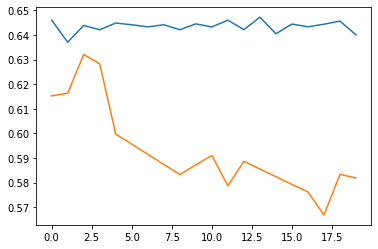

In [19]:
plt.figure()
plt.plot(yPedict)
plt.plot(target_train[-1])
plt.show()